In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import pearsonr

In [3]:
data = pd.read_csv('all_data.csv')

In [4]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
data.describe(include='all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [6]:
data = data.rename(columns=str.lower).rename(columns={'life expectancy at birth (years)': 'life_expectancy'})
data.columns

Index(['country', 'year', 'life_expectancy', 'gdp'], dtype='object')

In [7]:
data['country'].unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [8]:
data.isna().any()

country            False
year               False
life_expectancy    False
gdp                False
dtype: bool

In [9]:
data['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

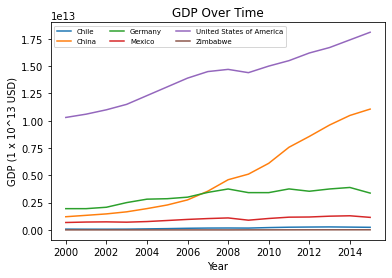

In [10]:
for country in data['country'].unique():
    plt.plot('year', 'gdp', data=data[data['country'] == country], label=country)
plt.legend(ncol=3, loc='upper left', fontsize=7)
plt.xlabel('Year')
plt.ylabel('GDP (1 x 10^13 USD)')
plt.title('GDP Over Time')
plt.show()
plt.close()

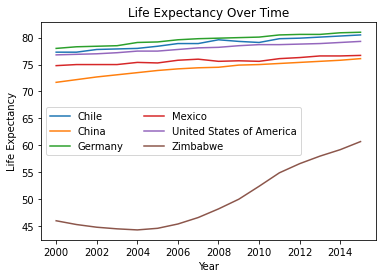

In [138]:
for country in data['country'].unique():
    plt.plot('year', 'life_expectancy', data=data[data['country'] == country], label=country)
plt.legend(ncol=2)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Time')
plt.show()
plt.close()

In [147]:
country_data_dict = {}
for country in data['country'].unique():
    country_data_dict[country] = []
    curr_country = data[data['country'] == country]
    # mean gdp
    country_data_dict[country].append(curr_country['gdp'].mean())
    # gdp avg growth
    init_gdp = int(curr_country[curr_country['year'] == 2000]['gdp'])
    fin_gdp = int(curr_country[curr_country['year'] == 2015]['gdp'])
    diff_gdp = (fin_gdp - init_gdp)/init_gdp
    country_data_dict[country].append(diff_gdp * 100 / 16)
    # mean life expectancy
    country_data_dict[country].append(curr_country['life_expectancy'].mean())
    # life expectancy avg growth
    init_le = int(curr_country[curr_country['year'] == 2000]['life_expectancy'])
    fin_le = int(curr_country[curr_country['year'] == 2015]['life_expectancy'])
    diff_le = (fin_le - init_le)/init_le
    country_data_dict[country].append(diff_le * 100 / 16)

country_data = pd.DataFrame.from_dict(country_data_dict, orient='index', columns = ['mean_gdp','mean_gdp_growth', 'mean_life_expectancy','mean_life_expectancy_growth']).reset_index().rename(columns={'index':'country'})
country_data

,country,mean_gdp,mean_gdp_growth,mean_life_expectancy,mean_life_expectancy_growth
0,Chile,1.697888e+11,13.217241,78.94375,0.243506
1,China,4.957714e+12,50.838682,74.26250,0.440141
2,Germany,3.094776e+12,4.569540,79.65625,0.240385
3,Mexico,9.766506e+11,4.284113,75.71875,0.168919
4,United States of America,1.407500e+13,4.733010,78.06250,0.246711
5,Zimbabwe,9.062580e+09,8.982410,50.09375,1.902174


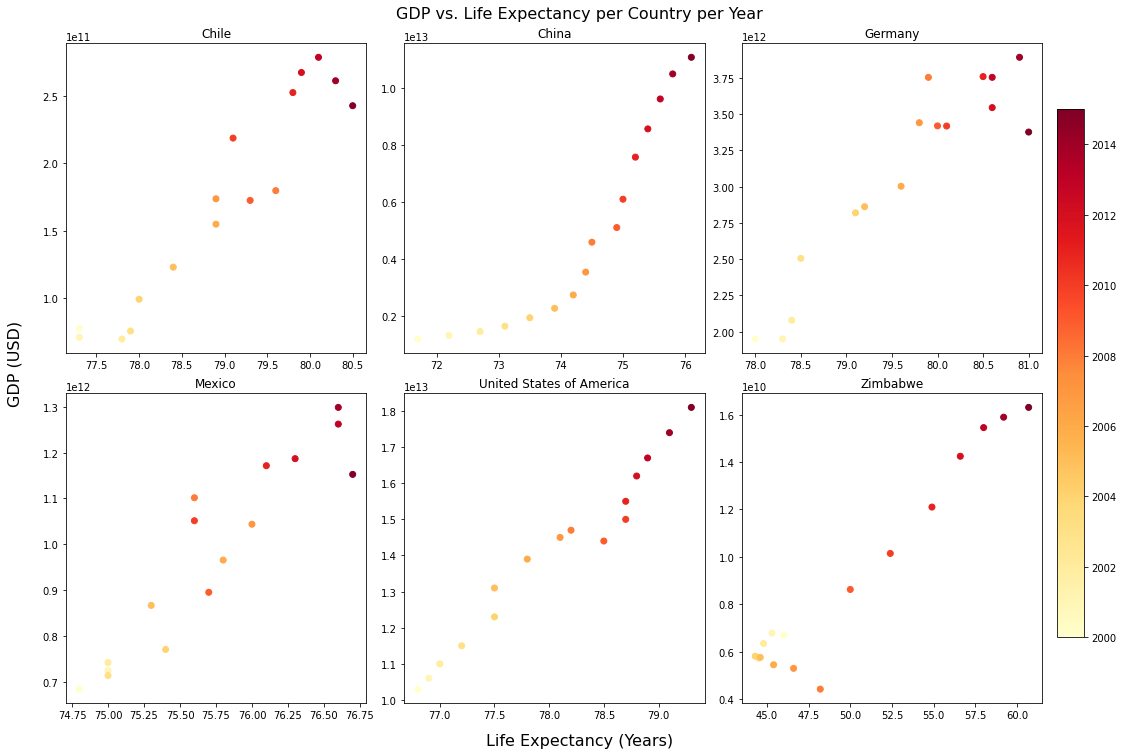

In [148]:
fig, axs = plt.subplots(2, 3, constrained_layout=True)
cmap=mpl.cm.ScalarMappable(cmap='YlOrRd', norm=mpl.colors.Normalize(vmin=2000, vmax=2015))
for i in range(3):
    first_row_country = data['country'].unique()[i]
    second_row_country = data['country'].unique()[i+3]
    axs[0, i].scatter('life_expectancy', 'gdp', data=data[data['country'] == first_row_country], c=data['year'].unique(), cmap='YlOrRd')
    axs[0, i].set_title(first_row_country)
    axs[1, i].scatter('life_expectancy', 'gdp', data=data[data['country'] == second_row_country], c=data['year'].unique(), cmap='YlOrRd')
    axs[1, i].set_title(second_row_country)
    
fig.set_size_inches(15, 10)
fig.colorbar(cmap, ax=axs[:, 2], orientation='vertical', shrink=0.8, location='right')
fig.suptitle('GDP vs. Life Expectancy per Country per Year', fontsize=16)
fig.text(-0.03, 0.5, 'GDP (USD)', rotation='vertical', fontsize=16, verticalalignment='center')
fig.text(0.5, -0.03, 'Life Expectancy (Years)', fontsize=16, horizontalalignment='center')
plt.show()
plt.close()

In [149]:
corr_dict = {}
for country in data['country'].unique():
    curr_country_data = data[data['country'] == country]
    r, p = pearsonr(curr_country_data['gdp'], curr_country_data['life_expectancy'])
    corr_dict[country] = (r, p)
corr_data = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['correlation', 'p value'])
corr_data

,correlation,p value
Chile,0.949877,1.865914e-08
China,0.908526,1.125099e-06
Germany,0.932699,1.401882e-07
Mexico,0.932238,1.468696e-07
United States of America,0.981709,1.749971e-11
Zimbabwe,0.966200,1.235852e-09


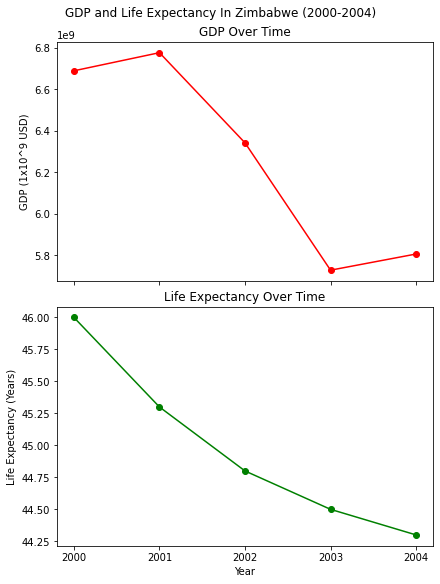

In [150]:
zimbabwe_decline_data = data[(data['country'] == 'Zimbabwe') & (data['year'] <= 2004)]
years = np.arange(2000, 2005)
fig, axs = plt.subplots(2, 1, sharex=True, constrained_layout=True)
axs[0].plot('year', 'gdp', data=zimbabwe_decline_data, color='red', marker='o')
axs[0].set_title('GDP Over Time')
axs[0].set_ylabel('GDP (1x10^9 USD)')
axs[1].plot('year', 'life_expectancy', data=zimbabwe_decline_data, color='green', marker='o')
axs[1].set_title('Life Expectancy Over Time')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Life Expectancy (Years)')
axs[1].set_xticks(years)
axs[1].set_xticklabels([str(x) for x in years])
fig.suptitle('GDP and Life Expectancy In Zimbabwe (2000-2004)')
fig.set_size_inches(6, 8)
plt.show()
plt.close()

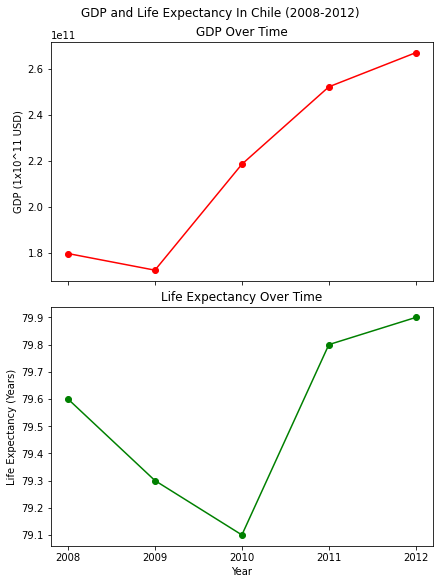

In [151]:
chile_decline_data = data[(data['country'] == 'Chile') & (data['year'] <= 2012) & (data['year'] >= 2008)]
years = np.arange(2008, 2013)
fig, axs = plt.subplots(2, 1, sharex=True, constrained_layout=True)
axs[0].plot('year', 'gdp', data=chile_decline_data, color='red', marker='o')
axs[0].set_title('GDP Over Time')
axs[0].set_ylabel('GDP (1x10^11 USD)')
axs[1].plot('year', 'life_expectancy', data=chile_decline_data, color='green', marker='o')
axs[1].set_title('Life Expectancy Over Time')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Life Expectancy (Years)')
axs[1].set_xticks(years)
axs[1].set_xticklabels([str(x) for x in years])
fig.suptitle('GDP and Life Expectancy In Chile (2008-2012)')
fig.set_size_inches(6, 8)
plt.show()
plt.close()

In [152]:
coeff_dict = {}
for country in data['country'].unique():
    curr_country = data[data['country'] == country]
    coeff_dict[country] = [np.round(x, 3) for x in np.polyfit(curr_country['life_expectancy'].to_numpy(), curr_country['gdp'].to_numpy(), 1)]
coeff_data = pd.DataFrame.from_dict(coeff_dict, orient='index', columns=['slope', 'intercept']).reset_index().rename(columns={'index':'country'})
coeff_data

,country,slope,intercept
0,Chile,6.896278e+10,-5.274392e+12
1,China,2.413350e+12,-1.742637e+14
2,Germany,6.385269e+11,-4.776788e+13
3,Mexico,3.146130e+11,-2.284545e+13
4,United States of America,2.868478e+12,-2.098456e+14
5,Zimbabwe,6.991261e+08,-2.595927e+10


In [153]:
country_data = country_data.merge(coeff_data, on='country')
country_data.head()

,country,mean_gdp,mean_gdp_growth,mean_life_expectancy,mean_life_expectancy_growth,slope,intercept
0,Chile,1.697888e+11,13.217241,78.94375,0.243506,6.896278e+10,-5.274392e+12
1,China,4.957714e+12,50.838682,74.26250,0.440141,2.413350e+12,-1.742637e+14
2,Germany,3.094776e+12,4.569540,79.65625,0.240385,6.385269e+11,-4.776788e+13
3,Mexico,9.766506e+11,4.284113,75.71875,0.168919,3.146130e+11,-2.284545e+13
4,United States of America,1.407500e+13,4.733010,78.06250,0.246711,2.868478e+12,-2.098456e+14
